<a href="https://colab.research.google.com/github/Jolanta27/AI-course/blob/master/Time_to_Practice__Keras_with_partial_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="180px" src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" align="left" hspace="30px" vspace="50px"/>

# Welcome to your next notebook with SDA!

During the classes we will mostly use [Google Colaboratory](https://colab.research.google.com/?hl=en) which is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

However, for bigger projects, especially involving Deep Learning and/or big data reading, it might be a better choice to setup Jupyter Notebook or Jupyter Lab on your computer. Also, it is worth noticing that there is a great number of useful extensions (see [nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html) and [jupyter-labextension](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)) not available for Colab users.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# Time to Practice: Keras
## Introduction to Artificial Neural Networks

**<font color='#4472c4'>PRACTICAL WORKSHOPS WITH SCREEN SHARING BY YOUR MENTOR</font>**

Start by reading through the presentation slides.

<br>

Upon completion of the **<font color='#4472c4'>Time to Practice: Keras</font>** course, you will gain familiarity with key elements of Neural Networks and get to undestand how such models work and learn. The easiest way to implement simple Neural Network architectures, ie. Multi-Layer Perceptrons, is to use model embedded in sklearn and apply them to the Supervised Learning problems, such as classification and regression tasks. These models are essential for the further understanding and implementing Deep Learning algorithms.

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Datasets description & loading

In the following notebook, we will analyze data and build models based on the following two datasets.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_wine
from sklearn.metrics import r2_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
# multi-layer perceptron in sklearn
# from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# from warnings import simplefilter
# from sklearn.exceptions import ConvergenceWarning

# simplefilter("ignore", category=ConvergenceWarning)

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>


## Linear Regression with Keras API

In this exercise, we'll discover how a simple neural network, without hidden layers, essentially performs the same function as linear regression, mapping input features to continuous output values. Utilizing Keras, a leading deep learning library, we will construct this basic neural network model.

The task involves working with synthetic training and testing data generated to simulate a linear relationship with added noise for realism.

By guiding you through the process of creating a neural network in Keras, configuring its layers, and training it on this synthesized dataset, you will gain hands-on experience in training models for regression tasks.


In [ ]:
x_train = np.linspace(0, 50, 51)

y_train = np.linspace(5, 155, 51)
y_train = y_train + np.random.normal(0, 10, 51)

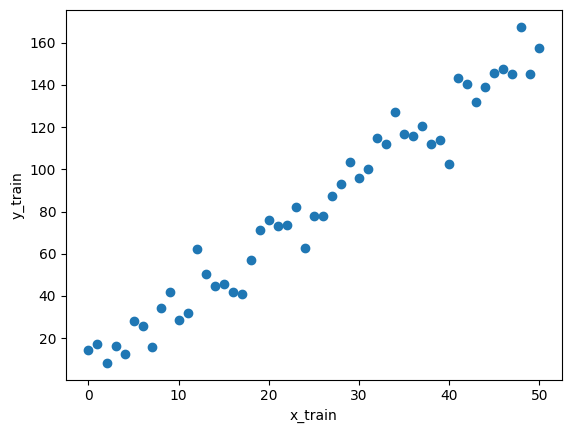

In [ ]:
plt.scatter(x_train, y_train)

plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

In [ ]:
import tensorflow as tf
# or
# from tensorflow.keras.layers import Dense

In [ ]:
# input layer and output layer defined concurrently
layer0 = tf.keras.layers.Dense(
    units=1,  # output shape
    input_shape=[1]  # input shape
)

# sequential API to connect layers one by one
model = tf.keras.Sequential([layer0])

# compilation to define loss function and optimizer
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1)
)

# you can save training results for later vizualization
history = model.fit(
    x_train,  # training set, features
    y_train,  # training set, target variable
    epochs=100,
    verbose=False  # whether to display output to the console or not
)

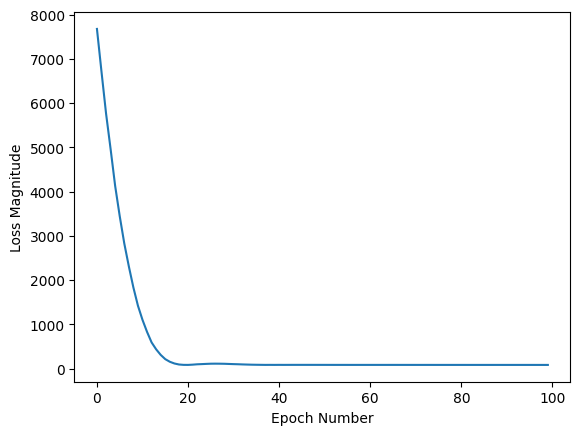

In [ ]:
plt.plot(history.history['loss'])

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.show()

weight: [3.1156783] bias: [3.5368001]


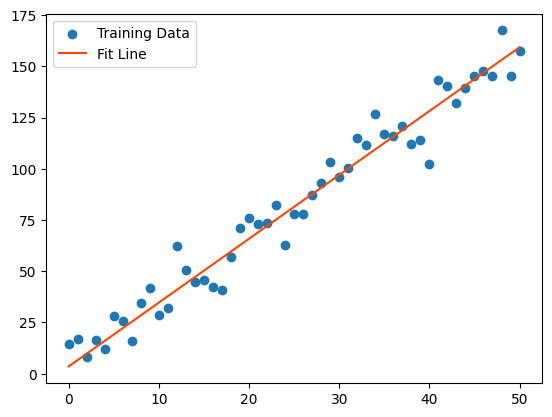

In [ ]:
weights_with_bias = layer0.get_weights()

weight = weights_with_bias[0][0]
bias = weights_with_bias[1]
print('weight: {} bias: {}'.format(weight, bias))

y_learned = x_train * weight + bias

plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_train, y_learned, color='orangered', label='Fit Line')

plt.legend()
plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>


## Nonlinear Regression with Keras API

This time, let's delve deeper and train the same model for non-linear relationships, which are commonplace in real-world data. Next, we will add some hidden layers and activation functions to see how they affect the results.

The task utilizes a synthetic dataset generated through a specific quadratic function $y=x^2 + 2x - 5$ with noise added to simulate real-world data irregularities.

Your input data, x, spans from -2 to 2, including 201 points cast into floating-point precision, ensuring it's suitable for neural network processing. The corresponding target values, y, are calculated using the predefined quadratic function, with Gaussian noise added for an extra challenge in model training.

Your mission is to construct and train a neural network using TensorFlow and Keras API that learns to fit this noisy quadratic data. This exercise will walk you through defining your neural network architecture, selecting the appropriate loss function and optimizer, and training your model to learn the underlying pattern of the data.

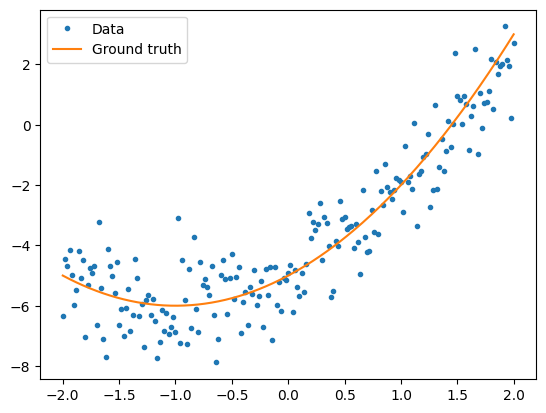

In [ ]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend()
plt.show()

In [ ]:
# input layer and output layer defined concurrently
layer0 = tf.keras.layers.Dense(
    units=1,  # output shape
    input_shape=[1]  # input shape
)

# sequential API to connect layers one by one
model = tf.keras.Sequential([layer0])

# compilation to define loss function and optimizer
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1)
)

# you can save training results for later vizualization
history = model.fit(
    x,  # training set, features
    y,  # training set, target variable
    epochs=100,
    verbose=False  # whether to display output to the console or not
)

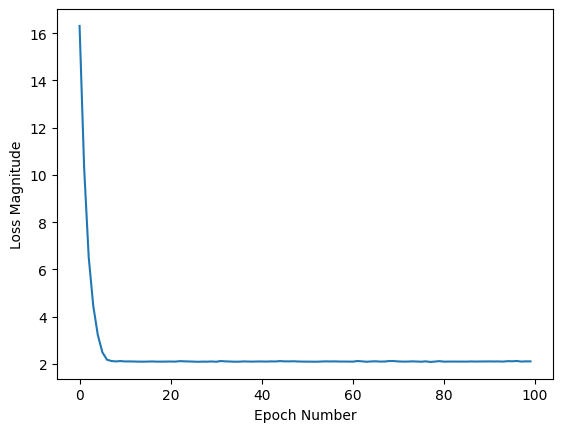

In [ ]:
plt.plot(history.history['loss'])

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.show()

weight: [1.9742577] bias: [-3.75141]


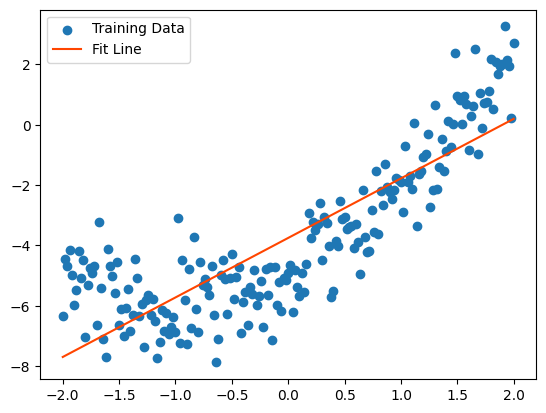

In [ ]:
weights_with_bias = layer0.get_weights()

weight = weights_with_bias[0][0]
bias = weights_with_bias[1]
print('weight: {} bias: {}'.format(weight, bias))

y_learned = x * weight + bias

plt.scatter(x, y, label='Training Data')
plt.plot(x, y_learned, color='orangered', label='Fit Line')

plt.legend()
plt.show()

In [ ]:
# input layer and output layer defined concurrently
layer0 = tf.keras.layers.Dense(
    units=1,  # output shape
    input_shape=[1],  # input shape
    activation="relu"
)

# sequential API to connect layers one by one
model = tf.keras.Sequential([layer0])

# compilation to define loss function and optimizer
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1)
)

# you can save training results for later vizualization
history = model.fit(
    x,  # training set, features
    y,  # training set, target variable
    epochs=100,
    verbose=False  # whether to display output to the console or not
)

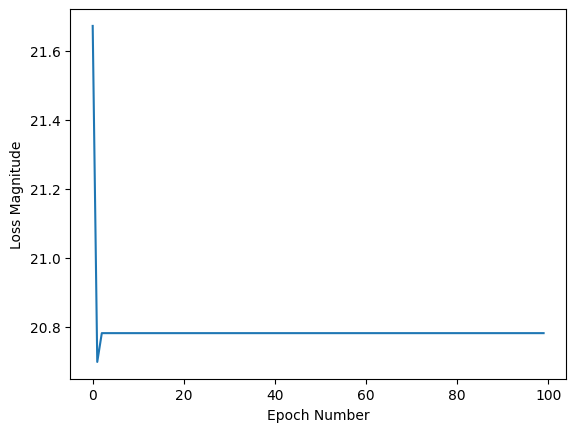

In [ ]:
plt.plot(history.history['loss'])

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.show()

weight: [0.16714288] bias: [-1.3547939]


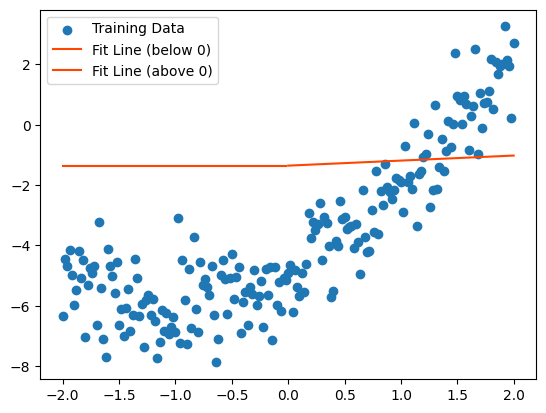

In [ ]:
weights_with_bias = layer0.get_weights()

weight = weights_with_bias[0][0]
bias = weights_with_bias[1]
print('weight: {} bias: {}'.format(weight, bias))

y_learned = x * weight + bias

plt.scatter(x, y, label='Training Data')
plt.plot(x[x < 0], np.ones(len(x[x < 0])) * bias, color='orangered', label='Fit Line (below 0)')
plt.plot(x[x >= 0], y_learned[x >= 0], color='orangered', label='Fit Line (above 0)')

plt.legend()
plt.show()

In [ ]:
# input layer and hidden layer defined concurrently
layer0 = tf.keras.layers.Dense(
    units=10,  # number of neurons in hidden layer
    input_shape=[1],  # input shape
    activation="relu"
)

layer1 = tf.keras.layers.Dense(
    units=1,  # output shape
    # input_shape=[1],  # define only in the first layers.Dense
    # activation="relu"  # here, output can be negative do not use relu!
)

# sequential API to connect layers one by one
model = tf.keras.Sequential([layer0, layer1])

# compilation to define loss function and optimizer
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1)
)

# you can save training results for later vizualization
history = model.fit(
    x,  # training set, features
    y,  # training set, target variable
    epochs=100,
    verbose=False  # whether to display output to the console or not
)

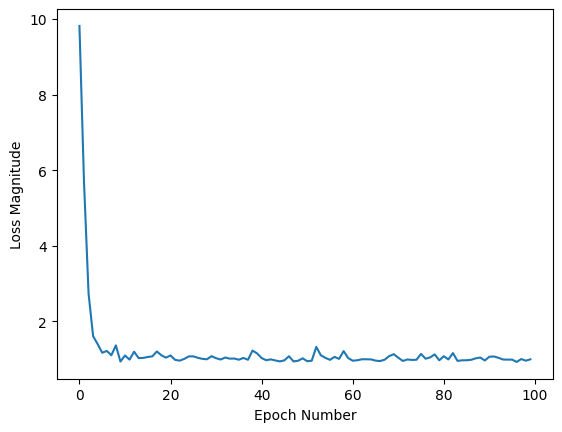

In [ ]:
plt.plot(history.history['loss'])

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.show()

weight: [ 0.05289957  1.578857   -0.24605529  0.13641903 -0.12289652  0.05106531
  0.05505887  2.0231304  -0.2260001   0.1516539 ] bias: [ 1.627149   -1.9411988  -0.8305959  -0.9089852  -0.77516484  0.1826672
  1.4826175   0.44250903 -0.81508183  1.5629772 ]
7/7 [==============================] - 0s 2ms/step


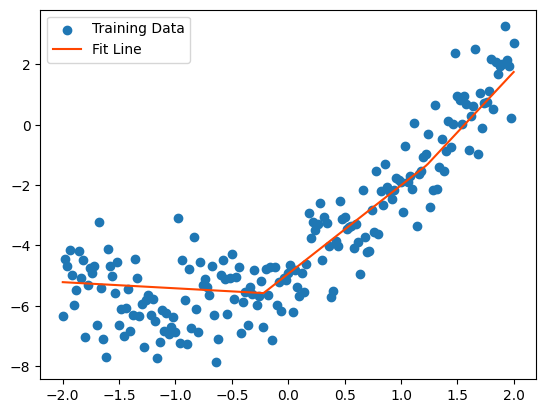

In [ ]:
weights_with_bias = layer0.get_weights()

weight = weights_with_bias[0][0]
bias = weights_with_bias[1]
print('weight: {} bias: {}'.format(weight, bias))

y_learned = model.predict(x)

plt.scatter(x, y, label='Training Data')
plt.plot(x, y_learned, color='orangered', label='Fit Line')

plt.legend()
plt.show()

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>** Custom Nonlinear Regression Model

After you've built and trained your initial neural network model to approximate the given quadratic function with added noise, it's time to dive deeper into the architecture of neural networks and understand how different configurations can impact the model's performance. This exploration will enable you to grasp the significance of network design choices and their effects on learning complex patterns from data.

1. Experimenting with Neuron Count
  
  Vary the number of neurons in the hidden layer of your model. Begin with a relatively small number of neurons and gradually increase it. Observe how the accuracy of your model's predictions changes with each configuration.
1. Adding More Hidden Layers

  Start by introducing additional hidden layers to your neural network. Experiment with different numbers of layers and observe the changes in model performance.

1. Playing with Activation Functions

  Experiment with different activation functions (e.g., `ReLU`, `sigmoid`, `tanh`) in the hidden layers of your neural network. Note how each affects the model's ability to converge and its final performance.

Reflect on the following questions:
* How does the number of neurons in a layer correlate with the model's accuracy and training time?
* What effects do additional hidden layers have on the model's ability to learn from the data?
* How do different activation functions impact the model's learning process and its success in approximating the quadratic function?

## Regression (California housing dataset)

This dataset was obtained from the StatLib repository, see http://lib.stat.cmu.edu/datasets/.

The target variable is the **<font color='#4472c4'>median house value for California</font>** districts.

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Features:
* `MedInc` median income in block
* `HouseAge` median house age in block
* `AveRooms` average number of rooms
* `AveBedrms` average number of bedrooms
* `Population` block population
* `AveOccup` average house occupancy
* `Latitude` house block latitude
* `Longitude` house block longitude

In [ ]:
def get_housing_data():
    california_housing = fetch_california_housing()

    X = pd.DataFrame(
        california_housing.data,
        columns=california_housing.feature_names
    )
    y = california_housing.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, test_size=0.2
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = get_housing_data()

In [ ]:
X_train_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551
...,...,...,...,...,...,...,...,...
16507,1.307215,0.507194,0.290620,-0.393391,-0.675847,-0.005588,-0.872016,0.808883
16508,-0.436266,0.348490,0.600411,0.398898,0.287195,0.069722,-0.759688,1.073144
16509,-0.496973,0.586545,-0.606759,-0.039216,0.289833,0.020306,-0.755007,0.599469
16510,0.965450,-1.079841,0.402175,-0.066265,0.308303,0.007076,0.906510,-1.185540


In [ ]:
y_train

array([1.03 , 3.821, 1.726, ..., 2.221, 2.835, 3.25 ])

In [ ]:
layer0 = tf.keras.layers.Dense(
    units=10,  # neurons in first hidden layer
    input_shape=[X_train_scaled.shape[1]],  # input shape
    activation="relu"
)

layer1 = tf.keras.layers.Dense(
    units=10,  # neurons in second hidden layer
    activation="relu"
)

layer2 = tf.keras.layers.Dense(
    units=1,  # output shape
)

# sequential API to connect layers one by one
model = tf.keras.Sequential([layer0, layer1, layer2])

# compilation to define loss function and optimizer
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1)
)

history = model.fit(
    X_train_scaled,  # training set, features
    y_train,  # training set, target variable
    validation_data=(X_test_scaled, y_test),  # validation data
    epochs=30,
    verbose=True
)

Epoch 1/30
516/516 [==============================] - 2s 2ms/step - loss: 0.4896 - val_loss: 0.5216
Epoch 2/30
516/516 [==============================] - 1s 2ms/step - loss: 0.4535 - val_loss: 0.4944
Epoch 3/30
516/516 [==============================] - 1s 2ms/step - loss: 0.4304 - val_loss: 0.4468
Epoch 4/30
516/516 [==============================] - 1s 2ms/step - loss: 0.6204 - val_loss: 0.5370
Epoch 5/30
516/516 [==============================] - 1s 2ms/step - loss: 1.3423 - val_loss: 1.3114
Epoch 6/30
516/516 [==============================] - 1s 2ms/step - loss: 1.3454 - val_loss: 1.3105
Epoch 7/30
516/516 [==============================] - 1s 2ms/step - loss: 1.3446 - val_loss: 1.3215
Epoch 8/30
516/516 [==============================] - 1s 3ms/step - loss: 1.3443 - val_loss: 1.3174
Epoch 9/30
516/516 [==============================] - 2s 3ms/step - loss: 1.3454 - val_loss: 1.3165
Epoch 10/30
516/516 [==============================] - 1s 3ms/step - loss: 1.3451 - val_loss: 1.3182

 43/129 [=========>....................] - ETA: 0s

<ipython-input-24-7709a8f0df8c>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


129/129 [==============================] - 0s 1ms/step


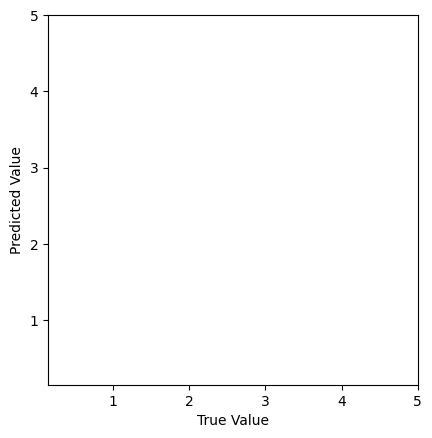

In [ ]:
sns.kdeplot(
    x=y_test,
    y=model.predict(X_test_scaled).flatten()  # convert column-vector to row-vector
)

plt.xlabel('True Value')
plt.ylabel("Predicted Value")

lims = [
    min(y_test.min(), model.predict(X_test_scaled).min()),  # min of both axes
    max(y_test.max(), model.predict(X_test_scaled).max()),  # max of both axes
]

plt.xlim(lims)
plt.ylim(lims)

# ensure the plot is square
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

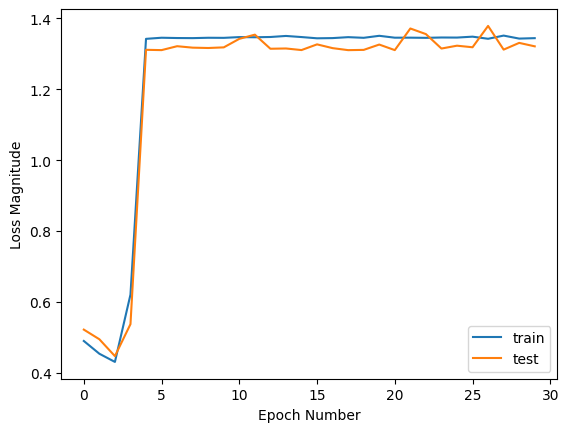

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()

### Classification (Wine dataset)

This is a copy of UCI ML Wine recognition datasets, see https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data.

The data is the results of a **<font color='#4472c4'>chemical analysis of wines</font>** grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

Features:
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

In [ ]:
def get_wine_data():
    wine_dataset = load_wine()

    X = pd.DataFrame(
        wine_dataset.data,
        columns=wine_dataset.feature_names
    )
    y = wine_dataset.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,random_state=42, test_size=0.2, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = get_wine_data()

In [ ]:
X_train_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.385801,-0.637871,1.776668,-1.224532,0.696430,0.526865,0.732292,-0.169549,-0.415783,-0.167467,0.624378,0.252908,0.467725
1,0.948519,-0.765445,1.253174,0.853284,0.091785,1.172795,1.333181,-0.590457,1.349742,0.305303,1.067155,0.151048,1.815768
2,0.523354,-0.519409,0.954034,-1.046433,-0.445678,0.930572,1.006382,-0.169549,-0.260002,-0.081509,-0.128343,0.893172,1.516203
3,0.973529,-0.555859,0.168793,-1.076116,-0.714409,0.526865,0.816627,-0.590457,0.363125,0.262324,0.890044,0.427526,1.932265
4,0.435820,0.820120,0.056615,0.556453,-0.512860,-0.555068,-1.291756,0.756449,-0.606183,1.474335,-1.766619,-1.435059,-0.297831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.685917,0.756333,1.327959,1.150115,-0.176946,-1.168702,-1.544762,1.177357,-1.817818,-0.274915,-0.261176,-0.794796,-0.730536
138,-1.652489,-0.610534,0.954034,1.892192,-0.781592,-0.571216,-0.395693,0.335541,-0.450402,-1.027050,1.819877,0.878620,-0.590739
139,0.673412,-0.492072,1.066212,-0.185624,0.696430,0.123159,0.574163,-0.590457,-0.104220,-0.339384,0.668656,0.383871,1.183353
140,-0.014354,1.011481,-0.055562,-0.334039,0.427699,-1.427074,-1.355008,0.335541,-1.142765,0.124791,-1.191008,-1.245891,-0.214618


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([47, 57, 38]))

In [ ]:
layer0 = tf.keras.layers.Dense(
    units=10,  # neurons in first hidden layer
    input_shape=[X_train_scaled.shape[1]],  # input shape
    activation="relu"
)

layer1 = tf.keras.layers.Dense(
    units=10,  # neurons in second hidden layer
    activation="relu"
)

layer2 = tf.keras.layers.Dense(
    units=1,  # output shape
    activation='sigmoid'
)

# sequential API to connect layers one by one
model = tf.keras.Sequential([layer0, layer1, layer2])

# compilation to define loss function and optimizer
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.1),
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,  # training set, features
    y_train,  # training set, target variable
    validation_data=(X_test_scaled, y_test),  # validation data
    epochs=25,
    verbose=False,
)

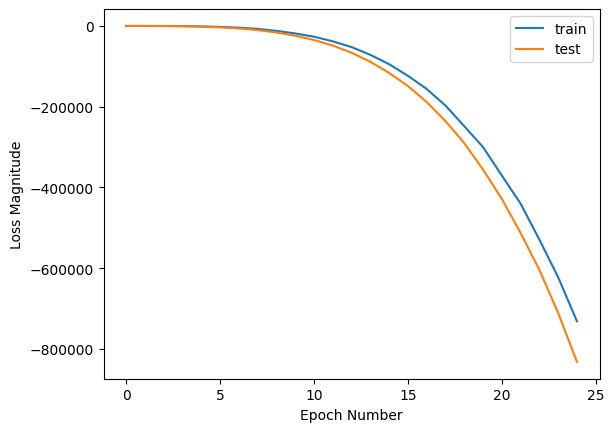

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

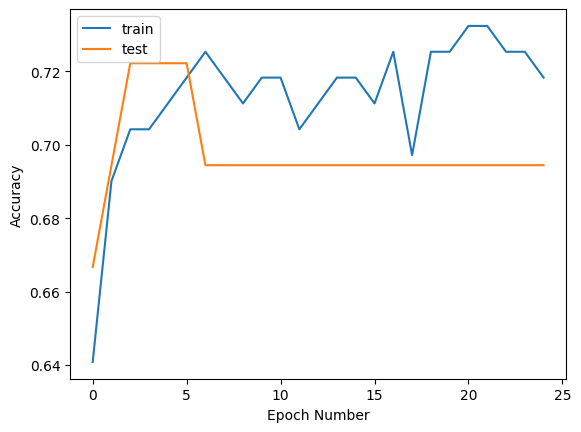

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')

plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Network hyper-parameters

Hyperparameters in a neural network are **<font color='#4472c4'>configuration settings</font>** that determine the behavior of the model. The selection of appropriate hyperparameters is crucial for achieving optimal performance and generalization. It often requires experimentation and tuning to find the best combination for a specific task and dataset.

Here are some commonly used hyperparameters:
* number of hidden layers
* number of neurons in each (hidden) layer
* activation functions
* learning rate
* batch size
* *regularization strength (L1 & L2)* (in future blocks)
* optimizer


<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>
<br>

# TASKS

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1</font>**

For wine and housing datasets, create MLPs and try different optimizers like `SGD`, `RMSprop` or `Adam`. Try various values of `learning_rate` parameter. How does it affect the model?

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = get_housing_data()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

def test_optimizer(model:tf.keras.Model, optimizer):
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  model.fit(X_train_scaled, y_train, epochs=20)
  metrics = model.evaluate(X_test_scaled, y_test)
  return metrics

metrics = {}
metrics[("SGD", 0.01)] = test_optimizer(model, tf.keras.optimizers.SGD(learning_rate=0.01))

# Test RMSprop optimizer with learning rate 0.001
metrics[("RMSprop", 0.001)] = test_optimizer(model, tf.keras.optimizers.RMSprop(learning_rate=0.001))

# Test Adam optimizer with learning rate 0.001
metrics[("Adam", 0.001)] = test_optimizer(model, tf.keras.optimizers.Adam(learning_rate=0.001))

Epoch 1/20
516/516 [==============================] - 1s 2ms/step - loss: 0.8113
Epoch 2/20
516/516 [==============================] - 1s 2ms/step - loss: 0.5178
Epoch 3/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4832
Epoch 4/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4625
Epoch 5/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4472
Epoch 6/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4340
Epoch 7/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4217
Epoch 8/20
516/516 [==============================] - 3s 5ms/step - loss: 0.4115
Epoch 9/20
516/516 [==============================] - 2s 5ms/step - loss: 0.4020
Epoch 10/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3946
Epoch 11/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3885
Epoch 12/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3979
Epoch 13/20
516/516 [====

## **<font color='#306998'>TASK </font><font color='#ffd33b'>2</font>**

Investigate how varying the `batch_size` during the training of a neural network affects both the training time and the model's performance. Understanding the influence of batch size is crucial for optimizing neural network training processes, as it can significantly impact learning dynamics, memory usage, and computational efficiency.

By measuring and comparing the training time and model performance across various batch sizes, you will gain insights into the trade-offs involved in choosing an appropriate batch size for neural network training.

## **<font color='#306998'>TASK </font><font color='#ffd33b'>3</font>**

A classic example of a classification dataset is the **<font color='darkorange'>Iris dataset</font>**.

Build a classifier (based on data loaded into the `iris_data` variable) based on multilayer perceptron implementation available in the scikit-learn library. Work on tuning the parameters to get the best result. Compare its performance with a previously known classification models.

*Hint: The challenge here, is to encode the flower `class` as a numerical value, so that it can be used in the learning process. You can use LabelEncoder, OrdinalEncoder or OneHotEncoder*

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)",
    "class"
]

iris_data = pd.read_csv(url, names=columns)

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

# Encode the target variable
label_encoder = LabelEncoder()
iris_data['target'] = label_encoder.fit_transform(iris_data['target'])

# Split the data into training and testing sets
X = iris_data.drop(columns=['target'])
y = iris_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP classifier
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Tune hyperparameters using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

# Evaluate the MLP classifier
y_pred_mlp = best_mlp.predict(X_test)
print("MLP Classifier Performance:")
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

# Compare with other classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0

Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           

## **<font color='#306998'>TASK </font><font color='#ffd33b'>4</font>**

See how the lack of feature standardization affects the model and its effectiveness for both datasets: wine and housing.

In [8]:
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score

wine = load_wine()
X_wine, y_wine = wine.data, wine.target

housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Train MLP Classifier on Wine dataset without standardization
mlp_wine_no_std = MLPClassifier(max_iter=1000, random_state=42)
mlp_wine_no_std.fit(X_wine_train, y_wine_train)
y_wine_pred_no_std = mlp_wine_no_std.predict(X_wine_test)

# Train MLP Regressor on Housing dataset without standardization
mlp_housing_no_std = MLPRegressor(max_iter=1000, random_state=42)
mlp_housing_no_std.fit(X_housing_train, y_housing_train)
y_housing_pred_no_std = mlp_housing_no_std.predict(X_housing_test)

# Standardize the Wine dataset
scaler_wine = StandardScaler()
X_wine_train_std = scaler_wine.fit_transform(X_wine_train)
X_wine_test_std = scaler_wine.transform(X_wine_test)

# Train MLP Classifier on standardized Wine dataset
mlp_wine_std = MLPClassifier(max_iter=1000, random_state=42)
mlp_wine_std.fit(X_wine_train_std, y_wine_train)
y_wine_pred_std = mlp_wine_std.predict(X_wine_test_std)

# Standardize the Housing dataset
scaler_housing = StandardScaler()
X_housing_train_std = scaler_housing.fit_transform(X_housing_train)
X_housing_test_std = scaler_housing.transform(X_housing_test)

# Train MLP Regressor on standardized Housing dataset
mlp_housing_std = MLPRegressor(max_iter=1000, random_state=42)
mlp_housing_std.fit(X_housing_train_std, y_housing_train)
y_housing_pred_std = mlp_housing_std.predict(X_housing_test_std)

# Compare performance for Wine dataset
print("Wine Dataset - Without Standardization")
print(classification_report(y_wine_test, y_wine_pred_no_std))
print("Accuracy:", accuracy_score(y_wine_test, y_wine_pred_no_std))

print("\nWine Dataset - With Standardization")
print(classification_report(y_wine_test, y_wine_pred_std))
print("Accuracy:", accuracy_score(y_wine_test, y_wine_pred_std))

# Compare performance for Housing dataset
print("\nHousing Dataset - Without Standardization")
print("Mean Squared Error:", mean_squared_error(y_housing_test, y_housing_pred_no_std))

print("\nHousing Dataset - With Standardization")
print("Mean Squared Error:", mean_squared_error(y_housing_test, y_housing_pred_std))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Wine Dataset - Without Standardization
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.9722222222222222

Wine Dataset - With Standardization
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy: 1.0

Housing Dataset - Without Standardization
Mean Squared Error: 0.7128829809083705

Housing Dataset - With Standardizati